<a href="https://colab.research.google.com/github/caiobellezi/estudos/blob/master/Estudos_Arvore_de_Decisao_(Decision_Tree)_Clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudos - Arvore de Decisao

Fonte: WEATHER.NOMINAL, Weka

http://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html

DESCRIÇÃO DOS ATRIBUTOS:

* Aparência {Ensolarado, Nublado, Chuvoso}
* Temperatura {Quente, Moderado, Frio}
* Umidade {Alta, Normal}
* Vento {Fraco, Forte}
* Jogar {Sim, Não}
______________________________

Exercicio proposto pelo Prof. Hugo de Paula - PUC-MG

In [57]:
#instalando bibliotecas necessarias
!pip install pydotplus -q
!pip install dtreeviz -q

In [84]:
#importando as bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from keras.preprocessing import image

from google.colab import files
uploaded = files.upload()

Saving clima.xlsx to clima (1).xlsx


In [20]:
clima_nominal = pd.read_excel('clima.xlsx', sheet_name=0)
clima_nominal

,Aparência,Temperatura,Umidade,Vento,Jogar
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Moderado,Alta,Fraco,Sim
4,Chuvoso,Frio,Normal,Fraco,Sim
5,Chuvoso,Frio,Normal,Forte,Não
6,Nublado,Frio,Normal,Forte,Sim
7,Ensolarado,Moderado,Alta,Fraco,Não
8,Ensolarado,Frio,Normal,Fraco,Sim
9,Chuvoso,Moderado,Normal,Fraco,Sim


In [21]:
print("\nDimensões: {0}".format(clima_nominal.shape))
print("\nCampos: {0}".format(clima_nominal.keys()))

clima_nominal.describe()


Dimensões: (14, 5)

Campos: Index(['Aparência', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')


,Aparência,Temperatura,Umidade,Vento,Jogar
count,14,14,14,14,14
unique,3,3,2,2,2
top,Ensolarado,Moderado,Normal,Fraco,Sim
freq,5,6,7,8,9


Converter o DataFrame para dicionário.

In [22]:
X_dict = clima_nominal.iloc[:,0:-1].T.to_dict().values()
X_dict

dict_values([{'Aparência': 'Ensolarado', 'Temperatura': 'Quente', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Quente', 'Umidade': 'Alta', 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 'Quente', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Moderado', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Forte'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Moderado', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Moderado', 'Umidade': 'Normal', 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Moderado', 'Umidade': 'Normal', 'Vento': 'F

Transformar o dicionário em matriz binária

In [31]:
vetor = DictVectorizer(sparse=False)
X_train = vetor.fit_transform(X_dict)
print('X_train é uma matriz 14x10, 14 linhas e 10 colunas as 10 colunas representam os 10 possivei estados\nAparencia:\t3\nTemperatura:\t3\nUmidade:\t2\nVento:\t2\nTotal:\t10')
display(X_train)
le = LabelEncoder()
y_train = le.fit_transform(clima_nominal.iloc[:,4])

# Exibe a estrutura do dado convertido em binário.
print("\nShape do dado de treinamento: {0}".format(X_train.shape))

print("Labels:", y_train)


X_train é uma matriz 14x10, 14 linhas e 10 colunas as 10 colunas representam os 10 possivei estados
Aparencia:	3
Temperatura:	3
Umidade:	2
Vento:	2
Total:	10


array([[0., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.]])


Shape do dado de treinamento: (14, 10)
Labels: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


## Indução do Modelo
Os três passos para indução de um modelo são:

1. Instanciar o modelo: DecisionTreeClassifier()
2. Treinar o modelo: fit()
3. Testar o modelo: predict()


### 1. Instanciamento do modelo
`random_state` = 0

`criterion` = Entropia

In [33]:
dt_clima = DecisionTreeClassifier(random_state=0, criterion="entropy")

### 2. Treinamento do modelo
Verificar acurácia

In [54]:
dt_clima = dt_clima.fit(X_train, y_train)
print("Acurácia:", dt_clima.score(X_train,y_train))

Acurácia: 1.0


### 3. Predição

In [55]:
y_pred = dt_clima.predict(X_train)
print("Acurácia:", accuracy_score(y_train,y_pred))
print(classification_report(y_train, y_pred))

cfn_matrix = confusion_matrix(y_train, y_pred)
cfn_table = pd.DataFrame(data=cfn_matrix, index=["Jogar=Não",'Jogar=Sim'], columns=['Jogar (prev) = Não', 'Jogar (prev) = Sim'])
display(cfn_table)

Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



,Jogar (prev) = Não,Jogar (prev) = Sim
Jogar=Não,5,0
Jogar=Sim,0,9


### Exibição da árvore de decisão

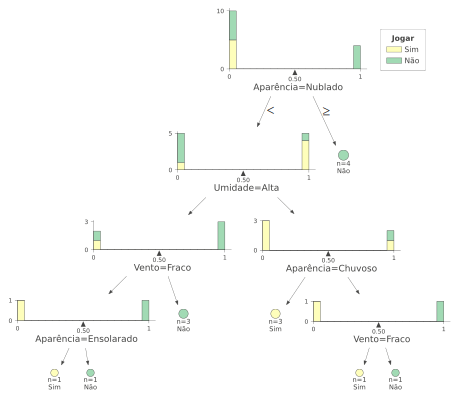

In [69]:
from dtreeviz.trees import *
viz = dtreeviz(dt_clima,
               X_train,
               y_train,
               target_name='Jogar',
               feature_names=vetor.feature_names_,
               class_names=['Sim','Não'],
               fancy=True)
viz

In [88]:
import pydotplus
!pip install graphviz -q
from graphviz import *


dot_data = tree.export_graphviz(dt_clima, out_file=None,
                                feature_names=vetor.feature_names_,
                                rounded = True,
                                filled = True,
                                class_names=['Sim', 'Não'])

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_pdf("clima.pdf")
graph.write_png("clima.png")

True

True